# 4. Scipy로 공부하는 확률 변수

## 01장. 이산 확률 분포

## 1. 베르누이 분포

In [71]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl

In [72]:
mpl.rcParams["font.family"]
mpl.matplotlib_fname()
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


- - -
### 1. 베르누이 분포

- 베르누이 확률 변수는 0, 1 두가지 값 중 하나만 가질 수 있다.
- 이산 확률 변수이고 pmf로 정의 할 수 있다.


In [147]:
%%latex
$
Bern(x;\theta)=
\begin{cases}
    \theta,& \text{if } x =1\\
1-\theta& \text{if } x =0
\end{cases}
$

<IPython.core.display.Latex object>

In [74]:
%%latex
$X \sim Bern(x;\theta)$

<IPython.core.display.Latex object>

- - -

### 2. Scipy 이용한 베르누이 확률 변수의 시뮬레이션

In [75]:
# Bern(x;theta) : x가 theta라는 확률을 가진다.
theta = 0.6
rv = sp.stats.bernoulli(theta)

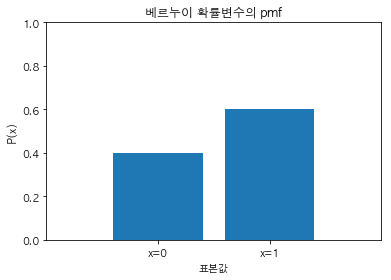

In [76]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 pmf")
plt.show()

In [77]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

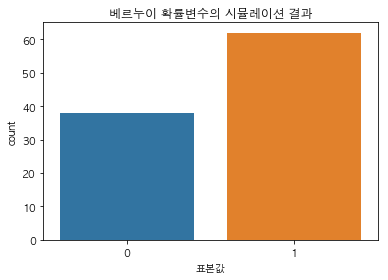

In [78]:
# 결과를 seaborn의 countplot 명령으로 시각화 한다.
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [79]:
# 이론적인 확률 분포와 샘플의 확률 분포를 동시에 나타내고 싶을 때

y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론":rv.pmf(xx), "시뮬레이션":y})
df.index=[0, 1]
df

,시뮬레이션,이론
0,0.38,0.4
1,0.62,0.6


In [80]:
# seaborn의 barplot으로 시각화
df2 = df.stack().reset_index()
df2.columns = ["표본값","유형","비율"]
df2

,표본값,유형,비율
0,0,시뮬레이션,0.38
1,0,이론,0.40
2,1,시뮬레이션,0.62
3,1,이론,0.60


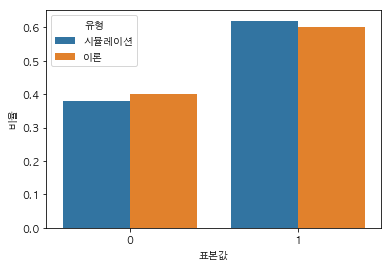

In [81]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.show()

- - -
### 연습문제 

베르누이 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다. 샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

- θ = 0.5
- θ = 0.9

In [100]:
# theta가 다른 2개의 베르누이 확률 객체 만들기

In [82]:
theta1 = 0.5
rv1 = sp.stats.bernoulli(theta1)

In [83]:
theta2 = 0.9
rv2 = sp.stats.bernoulli(theta2)

In [ ]:
# theta가 다른 베르누이 분포의 랜덤 값 사이즈 다르게 해서 구하기

In [102]:
x11 = rv1.rvs(size=10, random_state=0)
x12 = rv1.rvs(size=1000, random_state=1)

In [103]:
x21 = rv2.rvs(size=10, random_state=2)
x22 = rv2.rvs(size=1000, random_state=3)

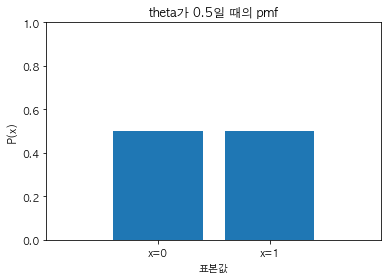

In [104]:
# 각 theta별 확률밀도함수 그린다.
xx = [0, 1]
plt.bar(xx, rv1.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("theta가 0.5일 때의 pmf")
plt.show()

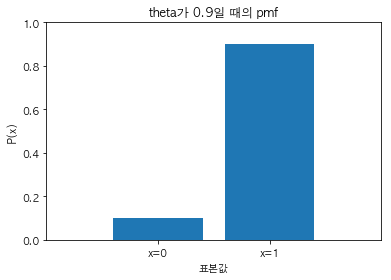

In [105]:
xx = [0, 1]
plt.bar(xx, rv2.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("theta가 0.9일 때의 pmf")
plt.show()

In [98]:
# 이론적 확률 밀도 함수와 실제 랜덤값 뽑았을 때의 확률 밀도 함수 비교하기

In [117]:
# theta 0.5, 랜덤 사이즈 : 10
y11 = np.bincount(x11, minlength=2)/float(len(x11))
df11 = pd.DataFrame({"이론": rv1.pmf(xx), "시뮬레이션":y11})
df11

,시뮬레이션,이론
0,0.3,0.5
1,0.7,0.5


In [118]:
# theta 0.5, 랜덤 사이즈 : 1000
y12 = np.bincount(x12, minlength=2)/float(len(x12))
df12 = pd.DataFrame({"이론": rv1.pmf(xx), "시뮬레이션":y12})
df12

,시뮬레이션,이론
0,0.494,0.5
1,0.506,0.5


In [122]:
# theta 0.9, 랜덤 사이즈 : 10
y21 = np.bincount(x21, minlength=2)/float(len(x21))
df21 = pd.DataFrame({"이론": rv2.pmf(xx), "시뮬레이션":y21})
df21

,시뮬레이션,이론
0,0.0,0.1
1,1.0,0.9


In [121]:
# theta 0.9, 랜덤 사이즈 : 1000
y22 = np.bincount(x22, minlength=2)/float(len(x22))
df22 = pd.DataFrame({"이론": rv2.pmf(xx), "시뮬레이션":y22})
df22

,시뮬레이션,이론
0,0.101,0.1
1,0.899,0.9


In [123]:
# seaborn의 barplot 이용해서 이론과 시뮬레이션 결과 비교하기

In [135]:
df_a = df11.stack().reset_index()
df_a.columns = ["표본값","유형","비율"]
df_a

,표본값,유형,비율
0,0,시뮬레이션,0.3
1,0,이론,0.5
2,1,시뮬레이션,0.7
3,1,이론,0.5


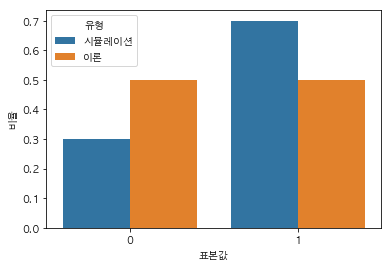

In [136]:
sns.barplot(x="표본값",y="비율", hue="유형", data=df_a)
plt.show()

In [129]:
df_b = df12.stack().reset_index()
df_b.columns = ["표본값","유형","비율"]
df_b

,표본값,유형,비율
0,0,시뮬레이션,0.494
1,0,이론,0.500
2,1,시뮬레이션,0.506
3,1,이론,0.500


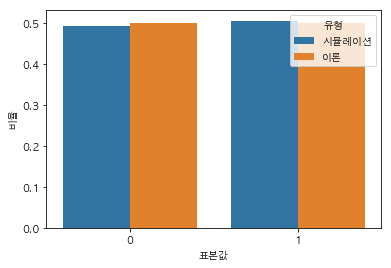

In [137]:
sns.barplot(x="표본값",y="비율", hue="유형", data=df_b)
plt.show()

- - -

In [139]:
df_c = df21.stack().reset_index()
df_c.columns = ["표본값","유형","비율"]
df_c

,표본값,유형,비율
0,0,시뮬레이션,0.0
1,0,이론,0.1
2,1,시뮬레이션,1.0
3,1,이론,0.9


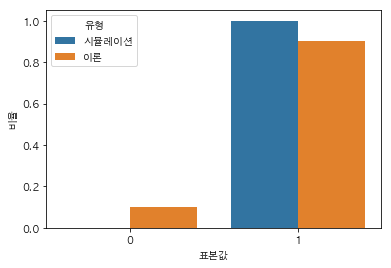

In [140]:
sns.barplot(x="표본값",y="비율", hue="유형", data=df_c)
plt.show()

In [133]:
df_d = df22.stack().reset_index()
df_d.columns = ["표본값","유형","비율"]
df_d

,표본값,유형,비율
0,0,시뮬레이션,0.101
1,0,이론,0.100
2,1,시뮬레이션,0.899
3,1,이론,0.900


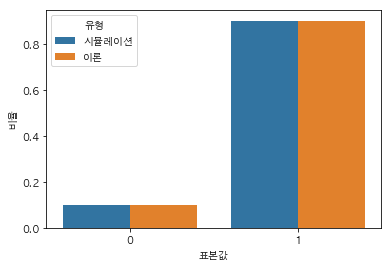

In [141]:
sns.barplot(x="표본값",y="비율", hue="유형", data=df_d)
plt.show()

샘플 사이즈를 크게 할 수록 이론적인 세타값에 가까운 분포를 보인다.

- - -

### 3. 베르누이 분포의 모멘트

- `np.mean` `np.var` 와 `sp.stats.describe`의 `[2],[3]` 이용

In [143]:
np.mean(x)

0.62

In [144]:
np.var(x, ddof=1)

0.23797979797979804

In [145]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)